# Decision Tree Classifier

In [28]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')


In [2]:
# iris dataset niye decission tree construct korbo 
from sklearn.datasets import load_iris


In [3]:
dic = load_iris()
dic

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
dic.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
    print(dic.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
dic.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
# convert it to dataframe 
df = pd.DataFrame(dic.data , columns=dic.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
# add output feature 
df['output'] = dic.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),output
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
df['output'].value_counts()

0    50
1    50
2    50
Name: output, dtype: int64

In [16]:
# indep and dept featire 
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]


In [18]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: output, Length: 150, dtype: int64

In [20]:
# train test split 
from sklearn.model_selection import train_test_split

x_train,x_test ,y_train,y_test = train_test_split(X,Y,test_size=0.33)

In [21]:
x_train.shape , y_train.shape

((100, 4), (100,))

In [22]:
x_test.shape , y_test.shape

((50, 4), (50,))

In [23]:
# decission tree construct witout parametr 
from sklearn.tree import DecisionTreeClassifier

In [24]:
# model creation 
tree_clasifier  = DecisionTreeClassifier()

In [25]:
# traine the model 
tree_clasifier.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.5, 0.9, 'x[2] <= 2.45\ngini = 0.663\nsamples = 100\nvalue = [31, 38, 31]'),
 Text(0.4230769230769231, 0.7, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5769230769230769, 0.7, 'x[3] <= 1.75\ngini = 0.495\nsamples = 69\nvalue = [0, 38, 31]'),
 Text(0.3076923076923077, 0.5, 'x[2] <= 5.05\ngini = 0.139\nsamples = 40\nvalue = [0, 37, 3]'),
 Text(0.15384615384615385, 0.3, 'x[0] <= 4.95\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.46153846153846156, 0.3, 'x[0] <= 6.15\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.5384615384615384, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8461538461538461, 0.5, 'x[2] <= 4.85\ngini = 0.067\nsamples = 29\nvalue = [0, 1, 28]'),
 Text(0.7692307692307693, 0.3, 'x[1] <

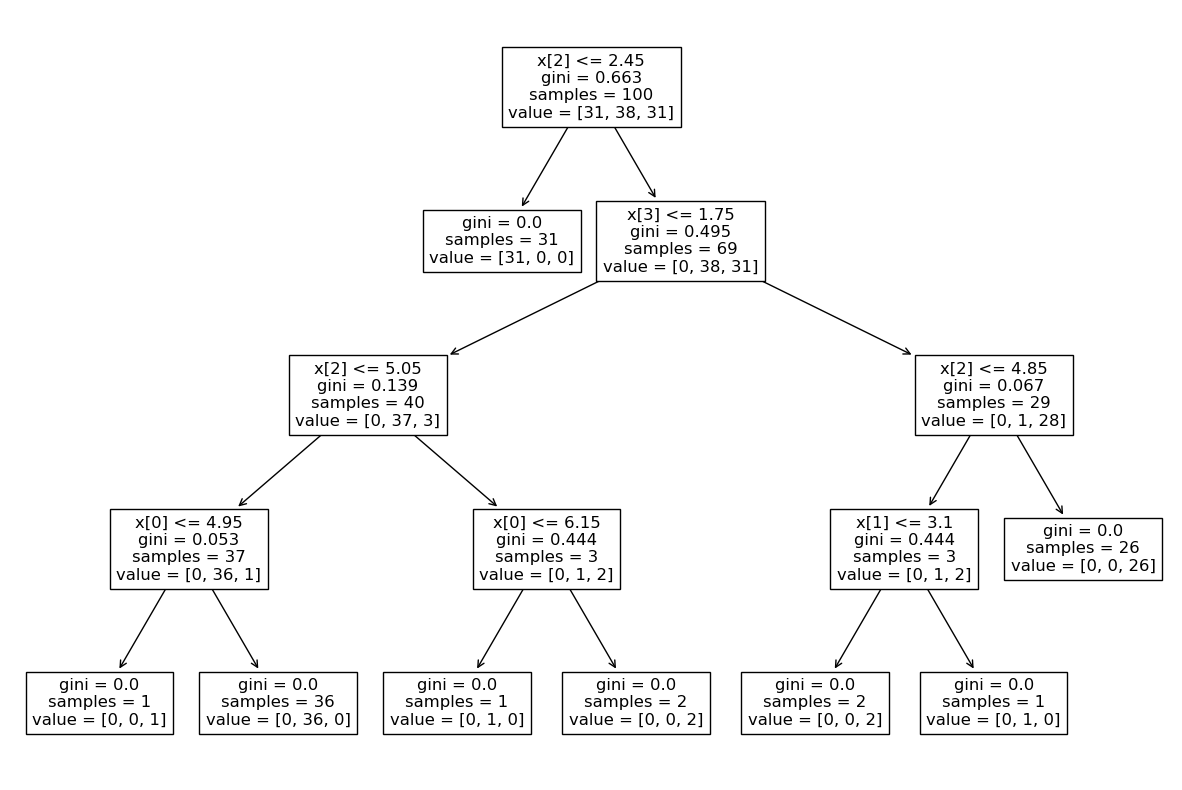

In [27]:
# plot the tree 
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(tree_clasifier)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.7\ngini = 0.663\nsamples = 100\nvalue = [31, 38, 31]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.495\nsamples = 69\nvalue = [0, 38, 31]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.139\nsamples = 40\nvalue = [0, 37, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.067\nsamples = 29\nvalue = [0, 1, 28]')]

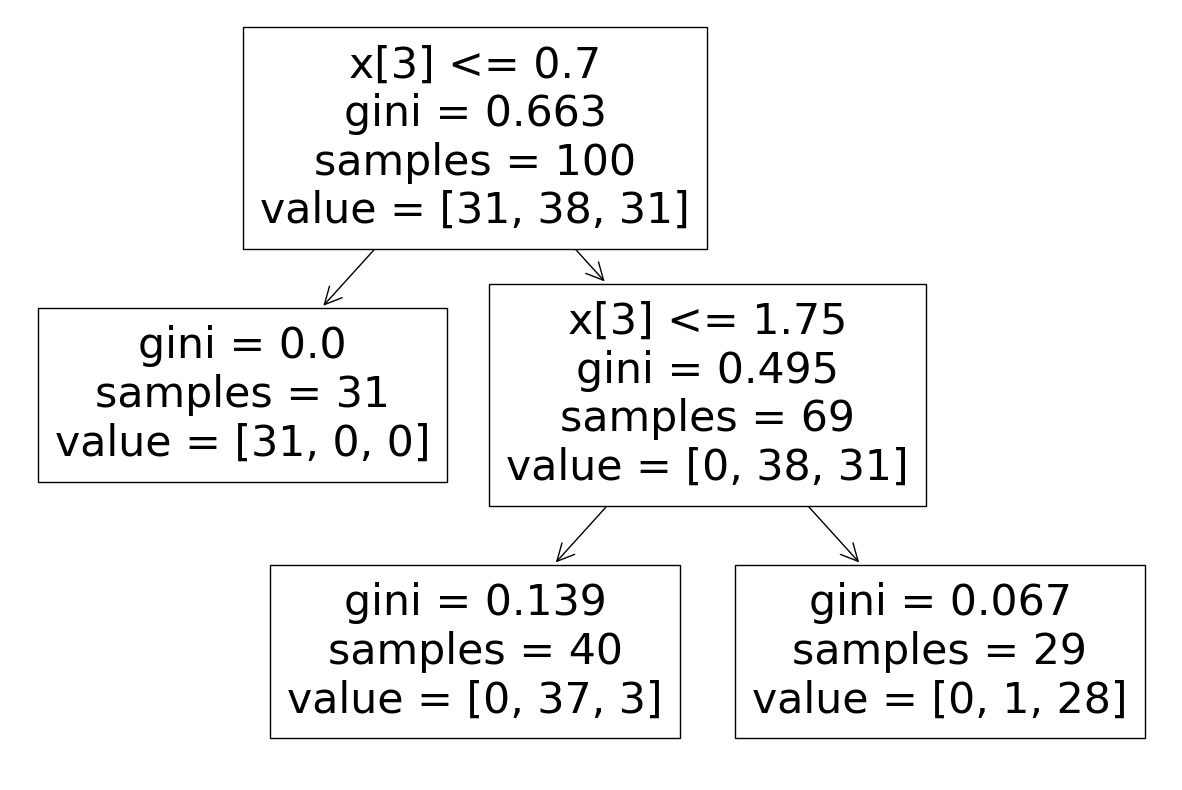

In [30]:
# post pruning 
# max_depth = 2

# model creation 
tree_clasifier = DecisionTreeClassifier(max_depth=2)

# traine the model 
tree_clasifier.fit(x_train,y_train)

# plotting check 
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(tree_clasifier)

In [31]:
# predict the da\ta 
y_test_pred = tree_clasifier.predict(x_test)

y_test_pred

array([2, 0, 2, 0, 1, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 2,
       0, 0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 2, 0, 1,
       2, 1, 2, 0, 1, 1])

In [32]:
# check accuracy 
from sklearn.metrics import accuracy_score , classification_report

# accuracy 
print(accuracy_score(y_test,y_test_pred))

# classification report 
print (classification_report(y_test,y_test_pred))

0.96
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.86      1.00      0.92        12
           2       1.00      0.89      0.94        19

    accuracy                           0.96        50
   macro avg       0.95      0.96      0.96        50
weighted avg       0.97      0.96      0.96        50



In [ ]:
DecisionTreeClassifier()

## pre pruning -hyperparameter tuning

In [36]:
parameter ={'criterion' : ["gini", "entropy", "log_loss"],
            'splitter' : ["best", "random"],
            'max_depth': [1,2,3,4]
            }

from sklearn.model_selection import GridSearchCV

# model create 
clf = GridSearchCV(tree_clasifier,param_grid=parameter,scoring='accuracy' , cv=5)

# train and validation 
clf.fit(x_train,y_train)

print(clf.best_params_)


{'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}


In [40]:
# now decison tree model 
tree_clasifier = DecisionTreeClassifier(criterion='entropy',max_depth=2,splitter='best')

# traine the model 
tree_clasifier.fit(x_train,y_train)

# predict 
y_test_pred = tree_clasifier.predict(x_test)

y_test_pred

array([2, 0, 2, 0, 1, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 2,
       0, 0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 2, 0, 1,
       2, 1, 2, 0, 1, 1])

In [43]:
# check accuracy 
from sklearn.metrics import accuracy_score , classification_report ,confusion_matrix

# accuracy 
print(accuracy_score(y_test,y_test_pred))

# confusion matrix 
print(confusion_matrix(y_test,y_test_pred))

# classification report 
print (classification_report(y_test,y_test_pred))

0.96
[[19  0  0]
 [ 0 12  0]
 [ 0  2 17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.86      1.00      0.92        12
           2       1.00      0.89      0.94        19

    accuracy                           0.96        50
   macro avg       0.95      0.96      0.96        50
weighted avg       0.97      0.96      0.96        50



[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\nentropy = 1.578\nsamples = 100\nvalue = [31, 38, 31]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\nentropy = 0.993\nsamples = 69\nvalue = [0, 38, 31]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.384\nsamples = 40\nvalue = [0, 37, 3]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.216\nsamples = 29\nvalue = [0, 1, 28]')]

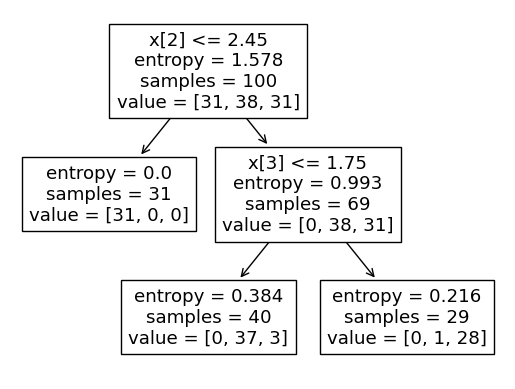

In [42]:
tree.plot_tree(tree_clasifier)